<a href="https://colab.research.google.com/github/pjindal01/my-colab-project/blob/master/Integrated_Retail_Analytics_for_Store_Optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Integrated Retail Analytics for Store Optimization**

## Mount the Data

In [25]:
# 1. Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Verify Files

In [26]:
!ls /content/drive/MyDrive/


'Colab Notebooks'	 'sales data-set.csv'
'Features data set.csv'  'stores data-set.csv'


## Import Libraries

In [27]:
# Step 3: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

## Load Data

In [28]:
features_df = pd.read_csv('/content/drive/MyDrive/Features data set.csv')
sales_df    = pd.read_csv('/content/drive/MyDrive/sales data-set.csv')
stores_df   = pd.read_csv('/content/drive/MyDrive/stores data-set.csv')

# Confirm data loaded successfully
print("Features data shape:", features_df.shape)
print("Sales data shape:", sales_df.shape)
print("Stores data shape:", stores_df.shape)

Features data shape: (8190, 12)
Sales data shape: (421570, 5)
Stores data shape: (45, 3)


## Data Cleaning

In [29]:
# Check for missing values
print("Missing values in Features Data:\n", features_df.isnull().sum())
print("\nMissing values in Sales Data:\n", sales_df.isnull().sum())
print("\nMissing values in Stores Data:\n", stores_df.isnull().sum())

Missing values in Features Data:
 Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

Missing values in Sales Data:
 Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64

Missing values in Stores Data:
 Store    0
Type     0
Size     0
dtype: int64


In [30]:
# Fill missing values (forward fill)
features_df.ffill(inplace=True)

In [33]:
# Convert 'Date' columns to datetime type
features_df['Date'] = pd.to_datetime(features_df['Date'], format='%d/%m/%Y')
sales_df['Date'] = pd.to_datetime(sales_df['Date'], format='%d/%m/%Y')

In [32]:
# Confirm data types
print("\nData types after conversion:")
print(features_df.dtypes)
print(sales_df.dtypes)


Data types after conversion:
Store                    int64
Date            datetime64[ns]
Temperature            float64
Fuel_Price             float64
MarkDown1              float64
MarkDown2              float64
MarkDown3              float64
MarkDown4              float64
MarkDown5              float64
CPI                    float64
Unemployment           float64
IsHoliday                 bool
dtype: object
Store                    int64
Dept                     int64
Date            datetime64[ns]
Weekly_Sales           float64
IsHoliday                 bool
dtype: object


## Exploratory Data Analysis (EDA)

### *Univariate Analysis*

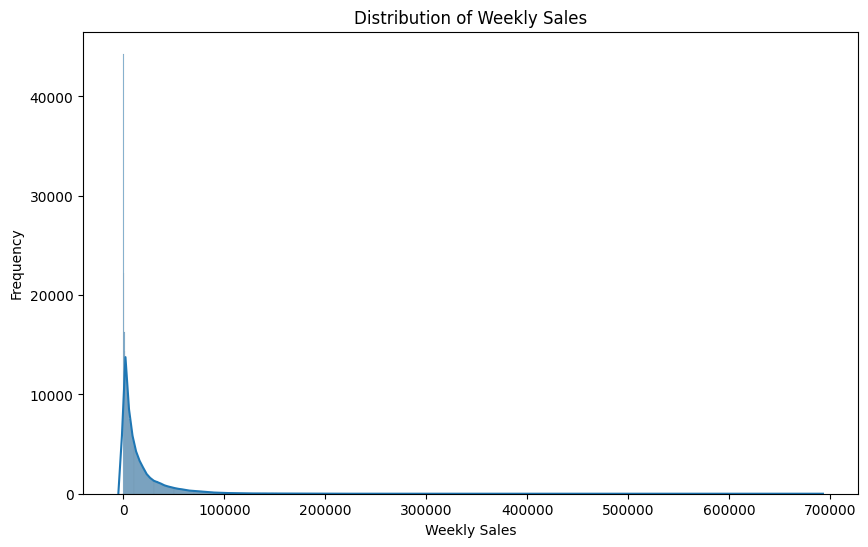

In [34]:
plt.figure(figsize=(10,6))
sns.histplot(sales_df['Weekly_Sales'], kde=True)
plt.title('Distribution of Weekly Sales')
plt.xlabel('Weekly Sales')
plt.ylabel('Frequency')
plt.show()

### *Bivariate Analysis*

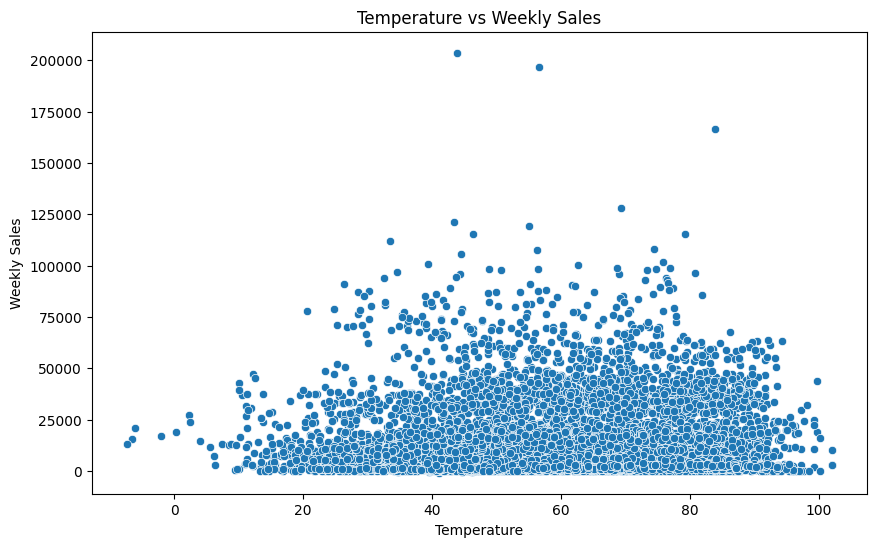

In [35]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=features_df['Temperature'], y=sales_df['Weekly_Sales'])
plt.title('Temperature vs Weekly Sales')
plt.xlabel('Temperature')
plt.ylabel('Weekly Sales')
plt.show()

### *Multivariate Analysis*

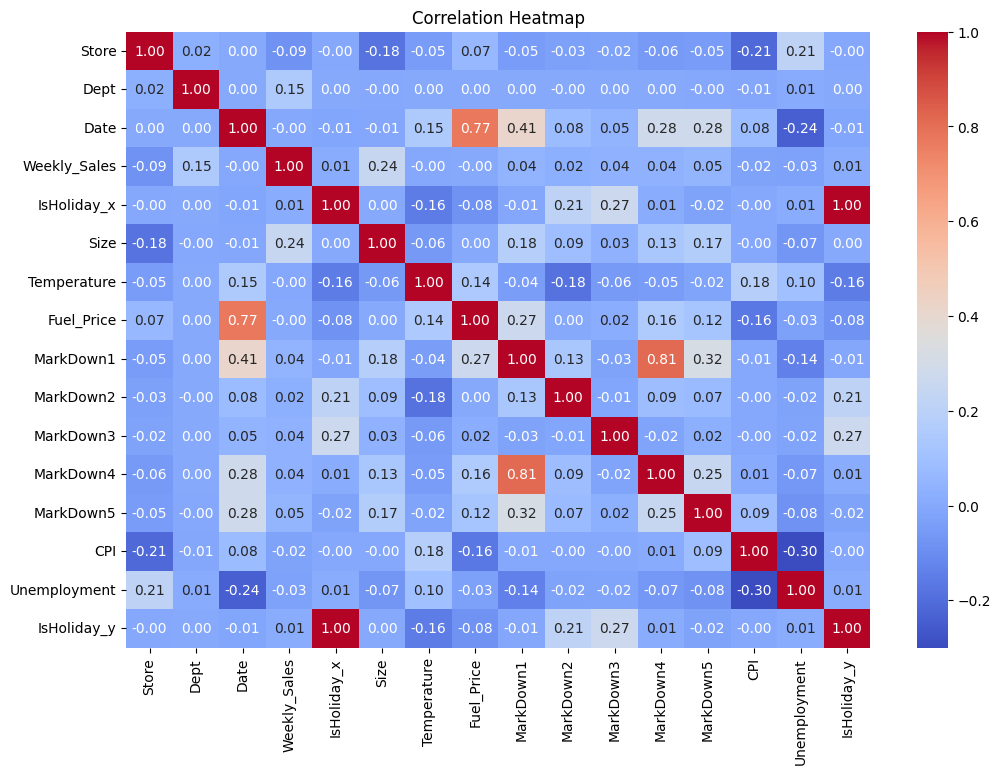

In [38]:
merged_df = sales_df.merge(stores_df, on='Store').merge(features_df, on=['Store', 'Date'])

# Drop the non-numeric 'Type' column before calculating correlation
merged_df_numeric = merged_df.drop('Type', axis=1)

plt.figure(figsize=(12,8))
sns.heatmap(merged_df_numeric.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

## Feature Engineering

In [40]:
# Create new feature: IsHoliday (True if Date in December, January, or July)
features_df['IsHoliday'] = features_df['Date'].dt.month.isin([12, 1, 7])
# Create new feature: IsHoliday (True if Date in December, January, or July)
features_df['IsHoliday'] = features_df['Date'].dt.month.isin([12, 1, 7])

## Data Preparation for Modeling

In [43]:
X = merged_df[['Store', 'Dept', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'IsHoliday_x']]
X = pd.get_dummies(X, columns=['Store', 'Dept'], drop_first=True) # One-hot encode Store and Dept
y = merged_df['Weekly_Sales']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Model Building

In [44]:
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate model performance
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Model RMSE: {rmse}")

Model RMSE: 13391.079292224673


## Conclusion and Save Submission Template

In [45]:
# Example: Save predictions into Sample_ML_Submission_Template
submission_df = pd.DataFrame({
    'Id': range(len(y_pred)),
    'Weekly_Sales_Prediction': y_pred
})

submission_df.to_csv('/content/drive/MyDrive/Sales_Prediction_Submission.csv', index=False)
print("Submission file saved.")

Submission file saved.
